In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import numpy as np

LINE_LENGTH: float = 3.0
N_LINES: int = 5
SEED = 124

np.random.seed(SEED)

# Generate Lines

In [49]:
from scripts.line_3d import Line3D, generate_random_line
from typing import List

lines: List[Line3D] = [Line3D(base_point=np.array([0, 0, 0]), direction=np.array([0, 0, 1]), length=LINE_LENGTH)]
lines += [generate_random_line(LINE_LENGTH) for _ in range(N_LINES - 1)]

# Visualize Lines

0-th Line color (R, G, B): [1.0, 0, 0], direction: [0. 0. 1.]
 Start point: [ 0.   0.  -1.5], end point: [0.  0.  1.5]
1-th Line color (R, G, B): [0.14999999999999988, 0.9, 0.0], direction: [ 0.12870912  0.91201917 -0.38942907]
 Start point: [-0.16421578 -1.41432416  0.45034317], end point: [ 0.22191159  1.32173334 -0.71794405]
2-th Line color (R, G, B): [0.0, 0.9, 0.5999999999999999], direction: [0.02012702 0.1280552  0.99156279]
 Start point: [-0.18380811 -0.26559417 -1.43916557], end point: [-0.12342706  0.11857142  1.5355228 ]
3-th Line color (R, G, B): [0.0, 0.45, 0.9], direction: [ 0.4285473  -0.71957547 -0.54640493]
 Start point: [-0.75636901  1.06913867  0.90042602], end point: [ 0.52927291 -1.08958775 -0.73878877]
4-th Line color (R, G, B): [0.29999999999999977, 0.0, 0.9], direction: [-0.10883241  0.93575693 -0.33543177]
 Start point: [ 0.05746999 -1.43169001  0.5899264 ], end point: [-0.26902724  1.37558079 -0.4163689 ]


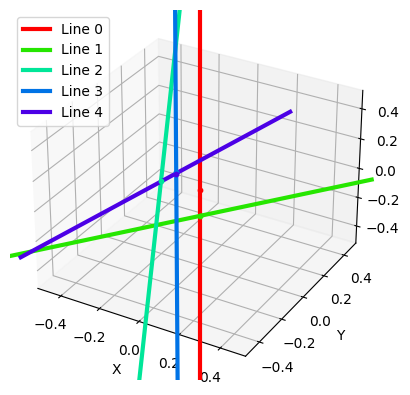

In [50]:
import matplotlib.pyplot as plt
from scripts.visualization import label2color

ax = plt.figure().add_subplot(projection="3d")
for i, line in enumerate(lines):
    color = label2color(i) if i > 0 else [1.0, 0, 0]
    print(f"{i}-th Line color (R, G, B): {color}, direction: {line.direction}")
    print(f" Start point: {line.start_point}, end point: {line.end_point}")
    # draw base point
    ax.scatter(line.base_point[0], line.base_point[1], line.base_point[2], color=color, s=10)
    ax.plot(
        [line.start_point[0], line.end_point[0]],
        [line.start_point[1], line.end_point[1]],
        zs=[line.start_point[2], line.end_point[2]],
        color=color,
        label=f"Line {i}",
        linewidth=3.0,
    )
ax.legend()
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


# Calculate Minimum distance

In [51]:
import numpy as np


def closest_points_between_lines(line1: Line3D, line2: Line3D) -> (np.ndarray, np.ndarray):
    """Calculate the closest points between two lines."""

    a1, b1 = line1.base_point, line1.direction
    a2, b2 = line2.base_point, line2.direction

    n = np.cross(b1, b2)
    denom = np.linalg.norm(n) ** 2

    if denom == 0:
        # lines are parallel
        return a1, a2

    matrix = np.vstack([np.cross(b2, n), np.cross(b1, n)])
    lambdas = (1 / denom) * matrix @ (a2 - a1)

    r1_star = a1 + lambdas[0] * b1
    r2_star = a2 + lambdas[1] * b2

    return r1_star, r2_star


def compute_closest_points_between_lines(reference_line: Line3D, other_lines: List[Line3D]) -> np.ndarray:
    a1, b1 = reference_line.base_point, reference_line.direction

    a2s = np.array([line.base_point for line in other_lines])
    b2s = np.array([line.direction for line in other_lines])

    ns = np.cross(b1[np.newaxis, :], b2s)
    denoms = np.linalg.norm(ns, axis=1) ** 2

    diff_mat = a2s - a1  # N x 3
    cross_b2s_ns = np.cross(b2s, ns)  # N x 3
    cross_b1_ns = np.cross(b1[np.newaxis], ns)  # N x 3

    lambda1s = np.einsum('ij,ij->i', cross_b2s_ns, diff_mat) / denoms
    lambda2s = np.einsum('ij,ij->i', cross_b1_ns, diff_mat) / denoms

    r1_stars = a1 + lambda1s[:, np.newaxis] * b1
    r2_stars = a2s + lambda2s[:, np.newaxis] * b2s

    return r1_stars, r2_stars


In [52]:
line1_id = 0
line2_id = 4
line1 = lines[line1_id]
line2 = lines[line2_id]
r1_star, r2_star = closest_points_between_lines(line1, line2)
print(r1_star, r2_star)

r1_star_batch, r2_star_batch = compute_closest_points_between_lines(line1, [line2])
print(r1_star_batch, r2_star_batch)

[0.        0.        0.0812076] [-0.10758621 -0.01251272  0.0812076 ]
[[0.        0.        0.0812076]] [[-0.10758621 -0.01251272  0.0812076 ]]


0-th Line color (R, G, B): [1.0, 0, 0], direction: [0. 0. 1.]
 Start point: [ 0.   0.  -1.5], end point: [0.  0.  1.5]
1-th Line color (R, G, B): [0.14999999999999988, 0.9, 0.0], direction: [ 0.12870912  0.91201917 -0.38942907]
 Start point: [-0.16421578 -1.41432416  0.45034317], end point: [ 0.22191159  1.32173334 -0.71794405]
2-th Line color (R, G, B): [0.0, 0.9, 0.5999999999999999], direction: [0.02012702 0.1280552  0.99156279]
 Start point: [-0.18380811 -0.26559417 -1.43916557], end point: [-0.12342706  0.11857142  1.5355228 ]
3-th Line color (R, G, B): [0.0, 0.45, 0.9], direction: [ 0.4285473  -0.71957547 -0.54640493]
 Start point: [-0.75636901  1.06913867  0.90042602], end point: [ 0.52927291 -1.08958775 -0.73878877]
4-th Line color (R, G, B): [0.29999999999999977, 0.0, 0.9], direction: [-0.10883241  0.93575693 -0.33543177]
 Start point: [ 0.05746999 -1.43169001  0.5899264 ], end point: [-0.26902724  1.37558079 -0.4163689 ]


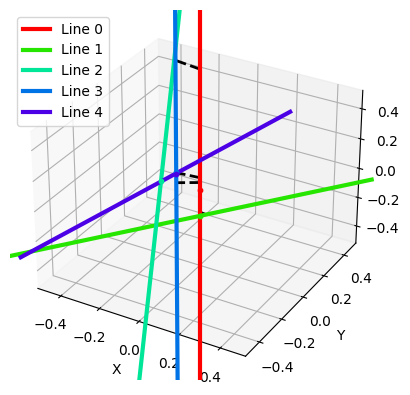

In [53]:
import matplotlib.pyplot as plt
from scripts.visualization import label2color

ax = plt.figure().add_subplot(projection="3d")

r1_stars, r2_stars = compute_closest_points_between_lines(lines[0], lines[1:])

# Draw the segment between the two closest points
for r1, r2 in zip(r1_stars, r2_stars):
    ax.plot([r1[0], r2[0]], [r1[1], r2[1]], [r1[2], r2[2]], color="black", linestyle="--", linewidth=2.0)

for i, line in enumerate(lines):
    color = label2color(i) if i > 0 else [1.0, 0, 0]
    print(f"{i}-th Line color (R, G, B): {color}, direction: {line.direction}")
    print(f" Start point: {line.start_point}, end point: {line.end_point}")
    # draw base point
    ax.scatter(line.base_point[0], line.base_point[1], line.base_point[2], color=color, s=10)
    ax.plot(
        [line.start_point[0], line.end_point[0]],
        [line.start_point[1], line.end_point[1]],
        zs=[line.start_point[2], line.end_point[2]],
        color=color,
        label=f"Line {i}",
        linewidth=3.0,
    )
ax.legend()
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()
